In [37]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import acquire
import prepare

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [38]:
titanic = acquire.get_titanic_data()
titanic = prepare.prep_titantic(titanic)

In [39]:
col = 'survived'
train, validate, test = prepare.train_val_test(titanic, col)

In [40]:
X_train = train.drop(columns=['survived', 'sex', 'embark_town'])
y_train = train.survived

X_validate = validate.drop(columns=['survived', 'sex', 'embark_town'])
y_validate = validate.survived

X_test = test.drop(columns=['survived', 'sex', 'embark_town'])
y_test = test.survived

In [41]:
y_train.mode()

0    0
Name: survived, dtype: int64

In [42]:
baseline = y_train.mode()
baseline_acc = (y_train == 0).mean()

In [43]:
print(f'Baseline: 0')
print(f'Baseline accuracy: {baseline_acc:.2%}')

Baseline: 0
Baseline accuracy: 61.64%


In [44]:
knn = KNeighborsClassifier(n_neighbors = 5)

knn

KNeighborsClassifier()

In [45]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [46]:
train_preds = knn.predict(X_train)

## 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [47]:
knn.score(X_train, y_train)

0.8314606741573034

In [49]:
confusion_matrix(y_train, train_preds)

array([[339,  45],
       [ 60, 179]])

In [50]:
print(classification_report(y_train, train_preds))

report = classification_report(y_train, train_preds, output_dict = True, target_names=('died','survived'))
pd.DataFrame(report)

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       384
           1       0.80      0.75      0.77       239

    accuracy                           0.83       623
   macro avg       0.82      0.82      0.82       623
weighted avg       0.83      0.83      0.83       623



,died,survived,accuracy,macro avg,weighted avg
precision,0.849624,0.799107,0.831461,0.824366,0.830244
recall,0.882812,0.748954,0.831461,0.815883,0.831461
f1-score,0.865900,0.773218,0.831461,0.819559,0.830345
support,384.000000,239.000000,0.831461,623.000000,623.000000


In [51]:
knn.score(X_validate, y_validate)

0.842443729903537

## 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [52]:
tn, fp, fn, tp = confusion_matrix(y_train,train_preds).ravel()
acc_all = tn + tp + fn + fp

tn, fp, fn, tp, acc_all

(339, 45, 60, 179, 623)

In [53]:
accuracy = (tp + tn)/acc_all
print(f"Accuracy: {accuracy:.3%}")

true_positive_rate = tp/(tp+fn)
print(f"True Positive Rate: {true_positive_rate:.3%}")

false_positive_rate = fp/(fp+tn)
print(f"False Positive Rate: {false_positive_rate:.3%}")

true_negative_rate = tn/(tn+fp)
print(f"True Negative Rate: {true_negative_rate:.3%}")

false_negative_rate = fn/(fn+tp)
print(f"False Negative Rate: {false_negative_rate:.3%}")

precision = tp/(tp+fp)
print(f"Precision: {precision:.3%}")

recall = tp/(tp+fn)
print(f"Recall: {recall:.3%}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score:.3%}")

support_pos = tp + fn
print(f"Support (0): {support_pos}")

support_neg = fp + tn
print(f"Support (1): {support_neg}")

Accuracy: 83.146%
True Positive Rate: 74.895%
False Positive Rate: 11.719%
True Negative Rate: 88.281%
False Negative Rate: 25.105%
Precision: 79.911%
Recall: 74.895%
F1 Score: 77.322%
Support (0): 239
Support (1): 384


## 4. Run through steps 1-3 setting k to 10

## 5. Run through steps 1-3 setting k to 20

In [54]:
num_neighbors = [10,20]
train_acc = []
val_acc = []

for i in num_neighbors:
    
    knn = KNeighborsClassifier(n_neighbors = i)
    
    knn.fit(X_train, y_train)
    
    train_acc.append(knn.score(X_train, y_train))
    
    val_acc.append(knn.score(X_validate, y_validate))

In [55]:
knn_metrics = pd.DataFrame({'k': num_neighbors,
                            'train_acc': train_acc,
                            'val_acc': val_acc})

knn_metrics

,k,train_acc,val_acc
0,10,0.778491,0.784566
1,20,0.739968,0.752412


## 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [59]:
# k being at 10 gives us the best in sample and out of sample accuracy

## 7. Which model performs best on our out-of-sample data from validate?

In [58]:
metrics = []

num_neighbors = range(1, 21, 2)

for i in num_neighbors:
    
    knn = KNeighborsClassifier(n_neighbors = i)
    
    knn.fit(X_train, y_train)
    
    train_acc = knn.score(X_train, y_train)
    
    val_acc = knn.score(X_validate, y_validate)
    
    output = {
            "k": i,
            "train_accuracy": train_acc,
            "validate_accuracy": val_acc
             }
    
    metrics.append(output)
    
    print(f'K Number {i}.\nTrain accuracy: {train_acc:.2%}.\nValidate accuracy: {val_acc:.2%}')
    print()
    print('---------------------------------------------')
    print()

K Number 1.
Train accuracy: 90.21%.
Validate accuracy: 91.64%

---------------------------------------------

K Number 3.
Train accuracy: 83.15%.
Validate accuracy: 85.53%

---------------------------------------------

K Number 5.
Train accuracy: 83.15%.
Validate accuracy: 84.24%

---------------------------------------------

K Number 7.
Train accuracy: 81.86%.
Validate accuracy: 82.96%

---------------------------------------------

K Number 9.
Train accuracy: 79.13%.
Validate accuracy: 80.06%

---------------------------------------------

K Number 11.
Train accuracy: 78.97%.
Validate accuracy: 79.74%

---------------------------------------------

K Number 13.
Train accuracy: 77.21%.
Validate accuracy: 79.10%

---------------------------------------------

K Number 15.
Train accuracy: 75.60%.
Validate accuracy: 76.21%

---------------------------------------------

K Number 17.
Train accuracy: 75.12%.
Validate accuracy: 75.56%

---------------------------------------------

K Numb

In [57]:
knn_metrics = pd.DataFrame(metrics)

knn_metrics

,number_of_neighbors,train_accuracy,validate_accuracy
0,1,0.902087,0.916399
1,3,0.831461,0.855305
2,5,0.831461,0.842444
3,7,0.818620,0.829582
4,9,0.791332,0.800643
5,11,0.789727,0.797428
6,13,0.772071,0.790997
7,15,0.756019,0.762058
8,17,0.751204,0.755627
9,19,0.744783,0.745981


**Takeaways**

 - The model that best works for our in sample data is with 5 neighbors with a train accuracy of 83.15%
 - The model that best works for out out of sample data is also with 5 neighbors with a validate accuracy of 84.24%

In [32]:
knn_metrics['difference'] = knn_metrics['train_accuracy'] - knn_metrics['validate_accuracy']

knn_metrics.sort_values('difference', ascending = False)

,number_of_neighbors,train_accuracy,validate_accuracy,difference
9,19,0.744783,0.745981,-0.001197
8,17,0.751204,0.755627,-0.004423
7,15,0.756019,0.762058,-0.006039
5,11,0.789727,0.797428,-0.007701
4,9,0.791332,0.800643,-0.009311
3,7,0.818620,0.829582,-0.010962
2,5,0.831461,0.842444,-0.010983
0,1,0.902087,0.916399,-0.014312
6,13,0.772071,0.790997,-0.018926
1,3,0.831461,0.855305,-0.023845


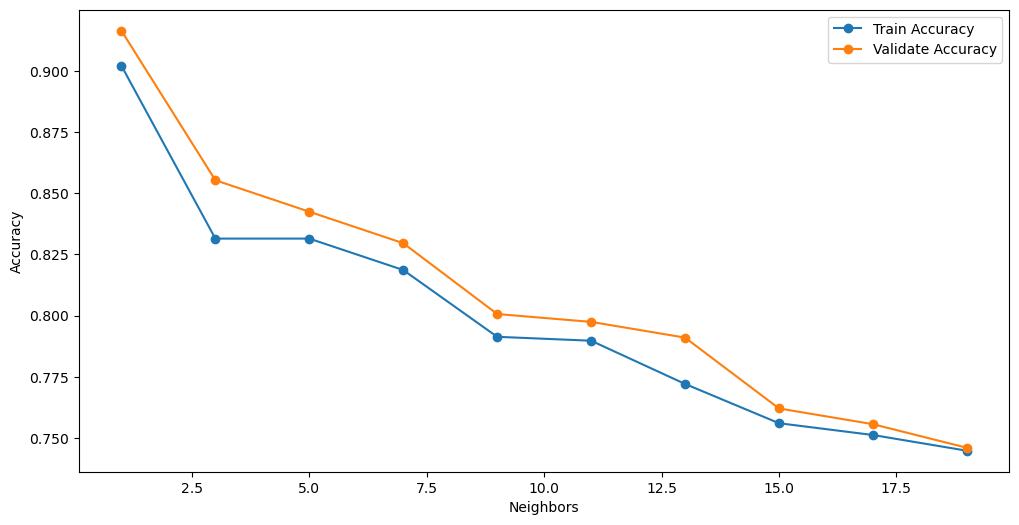

In [35]:
plt.figure(figsize=(12,6))
plt.plot(knn_metrics.number_of_neighbors, knn_metrics.train_accuracy, marker='o', label='Train Accuracy')
plt.plot(knn_metrics.number_of_neighbors, knn_metrics.validate_accuracy, marker='o', label='Validate Accuracy')    
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')                      
plt.legend()
plt.show()